In [ ]:
import pandas as pd
import os
import io

In [ ]:
data_path = "/Users/anasouza/ppgeb_masters/data/teste_ana_13_08.txt"

In [ ]:
data_list = []
with io.open(data_path, mode="r", encoding="utf-8") as f:
    for line in f:
        data_list.append(line.rstrip().split())

In [ ]:

def replace_blink_values(val):
    if val != 0:
        x = 500
    else:
        x = 0
    return x


def identificar_blink_eeg(val):
    try: 
        x = int(val)
        if x > 150:
            return 500
        else:
            return val
    except:
        return val


def clean_dataset(data_list):
    df = pd.DataFrame(data_list)
    df.columns=df.iloc[0] 
    df = df.iloc[1:]
    df.iloc[-1,-1] = df.iloc[-1,3]
    df.USER = df.USER.replace("START_RECORDING", 100).replace("STOP_EYETRACKER", 200)
    df = df.loc[df["USER"] != "CLIENT2_READY"]
    df = df.loc[df.USER.notnull()]

    df.USER = df.USER.astype(int)
    df.BKID = df.BKID.astype(float)

    df["BKID"] = df.BKID.apply(replace_blink_values)
    df['USER'] = df.USER.apply(identificar_blink_eeg)

    df["BKID"] = df["BKID"].astype("object")
    df["USER"] = df["USER"].astype("object")
    df["USER"] = df["USER"].astype("object")

    eeg = df.iloc[:,[2,-1]]
    et = df.iloc[:,:-1]

    return df, eeg, et

In [ ]:
df, eeg, et = clean_dataset(data_list)

In [ ]:
df

In [ ]:
df.loc[df.USER == 500]['BKID'].value_counts()

In [70]:
from scipy.stats.stats import pearsonr 
import scipy.signal

In [71]:
def is_500(val):
    if val == 500:
        return 500
    else:
        return 0

def get_blink_corr(df):
    x = df.USER.apply(is_500)
    y = df.BKID.apply(is_500)
    return pearsonr(x,y)



In [72]:
import matplotlib.pyplot as plt
import numpy as np

In [73]:
def plot_both(df, inicio, final):

    df_plot = df.loc[df["USER"] != "START_RECORDING 100"]
    df_plot = df_plot.loc[df["USER"] != "STOP_EYETRACKER 200"]
    df_plot = df_plot.loc[df["USER"].notnull()]

    df_plot = df_plot.iloc[inicio:final,:]

    df_plot.USER = df_plot.USER.astype(int)
    df_plot.TIME = df_plot.TIME.astype(float) 
    df_plot.BKID = df_plot.BKID.astype(int)

    df_plot["BKID"] = df_plot.BKID.apply(replace_blink_values)

    ax1 = df_plot.USER.plot(color='blue', grid=True, label='Count')
    ax2 = df_plot.BKID.plot(color='orange', grid=True, secondary_y=True)

    h1, l1 = ax1.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()

    plt.show()

    eeg = df_plot.iloc[:,[2,-1]]
    et = df_plot.iloc[:,:-1]

    x = df_plot.USER.apply(is_500)
    y = df_plot.BKID.apply(is_500)
    
    print(f"perason r: {pearsonr(x,y)}")
    print(f"cross-correlation: {np.correlate(x, y)}")
    print(f"scipy-cross-corr: {scipy.signal.correlate(x, y)}")
    return x, y

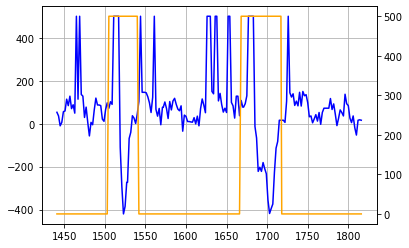

perason r: (0.1346537293478315, 0.057299142460540464)
cross-correlation: [2000000]
scipy-cross-corr: [      0       0       0       0       0       0       0       0       0
       0       0       0       0       0       0       0       0       0
       0       0       0       0       0       0       0       0       0
       0       0       0       0       0       0       0       0       0
       0       0       0       0       0       0       0       0       0
       0       0       0       0       0       0       0       0       0
       0       0       0       0       0       0       0       0       0
       0       0       0  250000  250000  500000  500000  500000  500000
  500000  500000  500000  500000  500000  500000  500000  500000  500000
  500000  500000  500000  500000  500000  500000  500000  500000  500000
  750000 1000000 1250000 1250000 1250000 1000000 1000000 1000000 1000000
 1000000 1000000 1000000 1000000 1000000 1000000 1000000 1000000 1250000
 1250000 1250000 125000

In [77]:
x, y = plot_both(df, 1000, 1200)

In [ ]:
get_blink_corr(df) #pouca correlação, mesmo quando em sinais binários. Vamos tentar de outra forma.

# Calcular a Sincronização

In [ ]:
!pip install OpenSync

In [ ]:
import OpenSync

In [ ]:
? OpenSync.EEG